<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** Hotel Bookings
  
Last update: September, 2025

In [ ]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install --upgrade ydata-profiling

In [123]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
from ydata_profiling import ProfileReport

In [3]:
# Panadas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Load the data

In [2]:
# Loading the CSV file as a dataframe
reservas = pd.read_csv('./data/hotel_bookings_modified.csv')

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_4692/1840387268.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservas = pd.read_csv('./data/hotel_bookings_modified.csv')


In [4]:
# Showing the dataframe dimensions
print(reservas.shape)

# Showing the column data types
print(reservas.dtypes)

# Showing the top 5 rows
reservas.head(5)

(58895, 33)
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN


### Explore the *Categorical* columns

In [12]:
categorial_columns = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','assigned_room_type','reserved_room_type','deposit_type','agent','company','customer_type','reservation_status']
total = reservas.shape[0]
print(total)
for column in categorial_columns:
    frecuencias = reservas[column].value_counts()
    schema = {'Categoria': frecuencias.index,
         'Valor': frecuencias.values}
    
    df = pd.DataFrame(schema)
    
    df['Proporcion'] = df['Valor']/total
    print('Nombre atributo: ', column)
    print(df)
    print("-----------------------------------")

58895
Nombre atributo:  hotel
      Categoria  Valor  Proporcion
0  Resort Hotel  40063        0.68
1    City Hotel  18832        0.32
-----------------------------------
Nombre atributo:  is_canceled
   Categoria  Valor  Proporcion
0          0  34666        0.59
1          1  24229        0.41
-----------------------------------
Nombre atributo:  meal
   Categoria  Valor  Proporcion
0         BB  45060        0.77
1         HB  10096        0.17
2         SC   1780        0.03
3  Undefined   1169        0.02
4         FB    790        0.01
-----------------------------------
Nombre atributo:  country
    Categoria  Valor  Proporcion
0         PRT  27559        0.47
1         GBR   7595        0.13
2         ESP   5275        0.09
3         FRA   3037        0.05
4         IRL   2371        0.04
..        ...    ...         ...
136       BHR      1        0.00
137       BDI      1        0.00
138       SYR      1        0.00
139       UGA      1        0.00
140       GAB      1       

In [23]:
reservas['Id'] = np.arange(len(r))
reservas.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'Id'],
      dtype='object')

## Cantidad de Reservas y Tasa de Cancelacion por Hotel

In [65]:
pivot = reservas.pivot_table(index=['hotel'], columns='is_canceled', values='Id', aggfunc='count')
pivot['Total'] = df_p[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
renamed.head()

is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,City Hotel,5727,13105,18832,0.70
1,Resort Hotel,28939,11124,40063,0.28


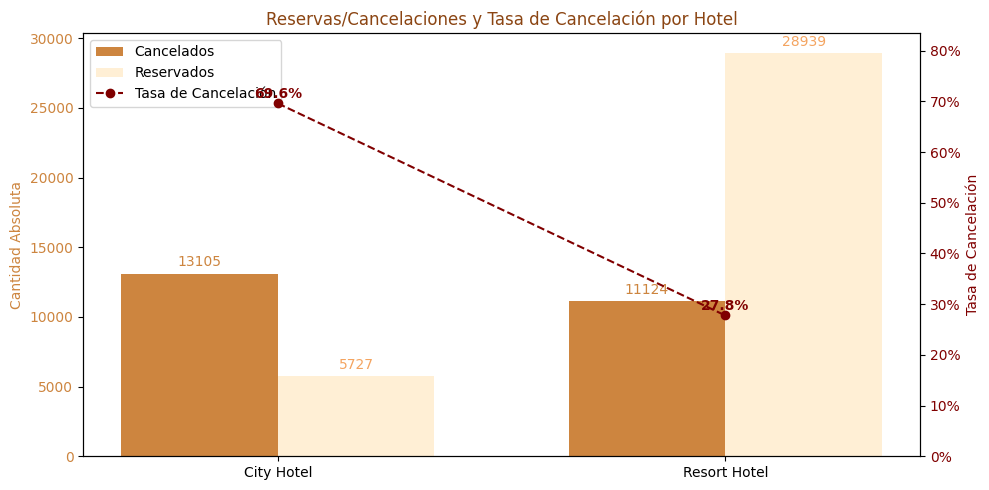

In [78]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Hotel', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Comida

In [81]:
pivot = reservas.pivot_table(index=['meal'], columns='is_canceled', values='Id', aggfunc='count')
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
renamed.head()

is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,BB,26787,18273,45060,0.41
1,FB,312,478,790,0.61
2,HB,6246,3850,10096,0.38
3,SC,438,1342,1780,0.75
4,Undefined,883,286,1169,0.24


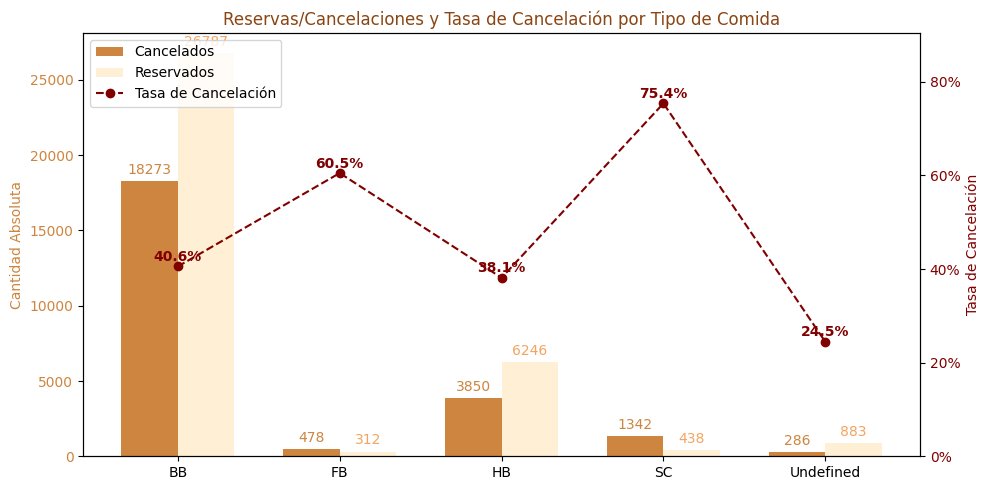

In [82]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de Comida', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Segmento de mercado

In [90]:
pivot = reservas.pivot_table(index=['market_segment'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

8


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,Aviation,0.00,22.00,22.00,1.00
1,Complementary,203.00,51.00,254.00,0.20
2,Corporate,2083.00,538.00,2621.00,0.21
3,Direct,6094.00,1306.00,7400.00,0.18
4,Groups,4872.00,5527.00,10399.00,0.53


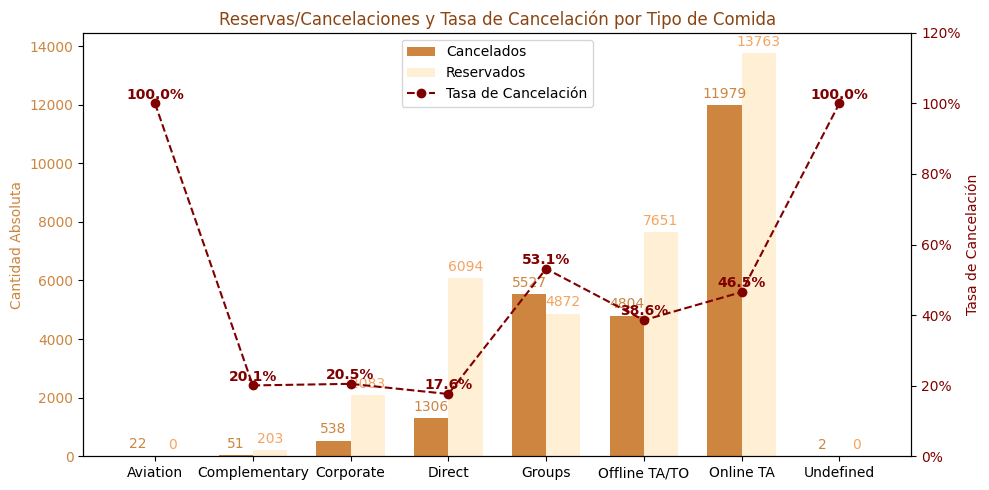

In [92]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Segmento de mercado', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Canal de Distribución

In [95]:
pivot = reservas.pivot_table(index=['distribution_channel'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

5


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,Corporate,2701,979,3680,0.27
1,Direct,7048,1793,8841,0.20
2,GDS,1,10,11,0.91
3,TA/TO,24915,21443,46358,0.46
4,Undefined,1,4,5,0.80


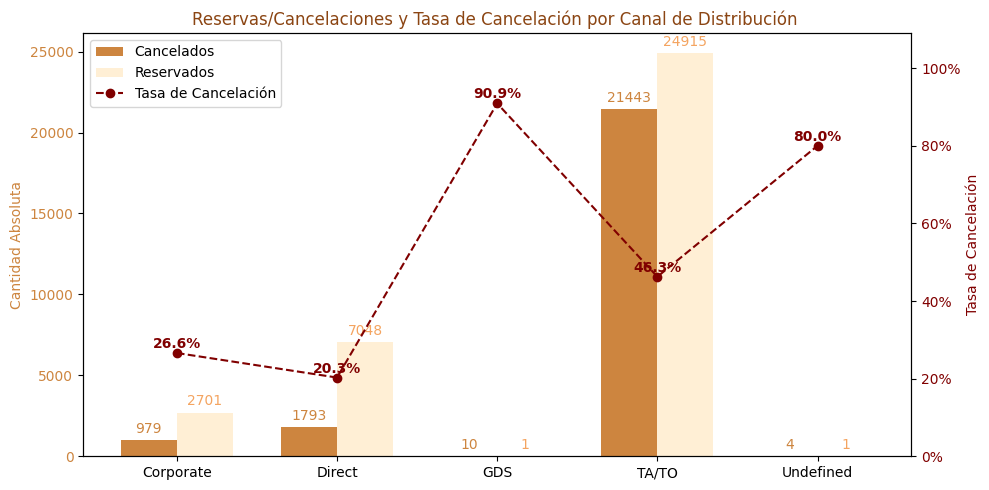

In [97]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Canal de Distribución ', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Depósito

In [101]:
reservas['deposit_type'] = reservas['deposit_type'].map(lambda x : x.replace('Non Refund','No Refund'))

In [102]:
pivot = reservas.pivot_table(index=['deposit_type'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

3


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,No Deposit,34476,17857,52333,0.34
1,No Refund,69,6350,6419,0.99
2,Refundable,121,22,143,0.15


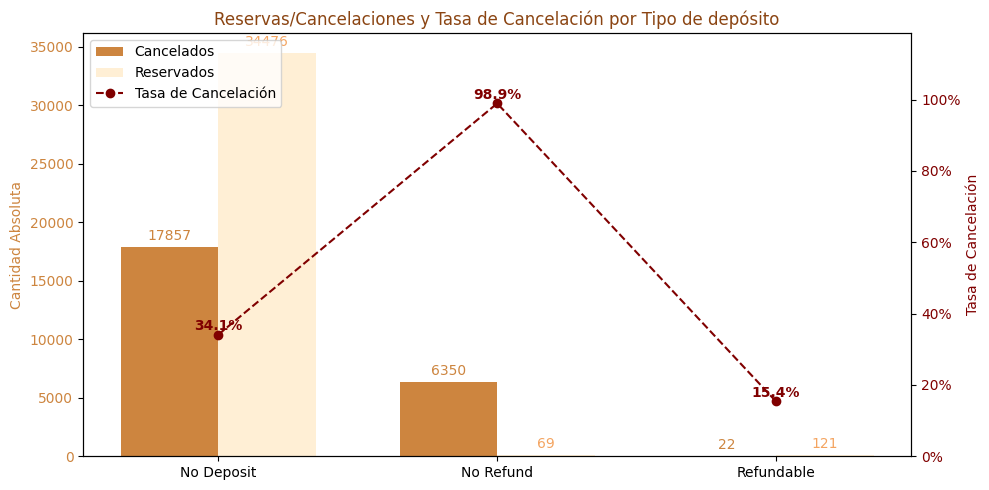

In [103]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de depósito', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Cliente

In [106]:
pivot = reservas.pivot_table(index=['customer_type'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

4


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,Contract,2153,333,2486,0.13
1,Group,276,36,312,0.12
2,Transient,22618,19812,42430,0.47
3,Transient-Party,9278,3800,13078,0.29


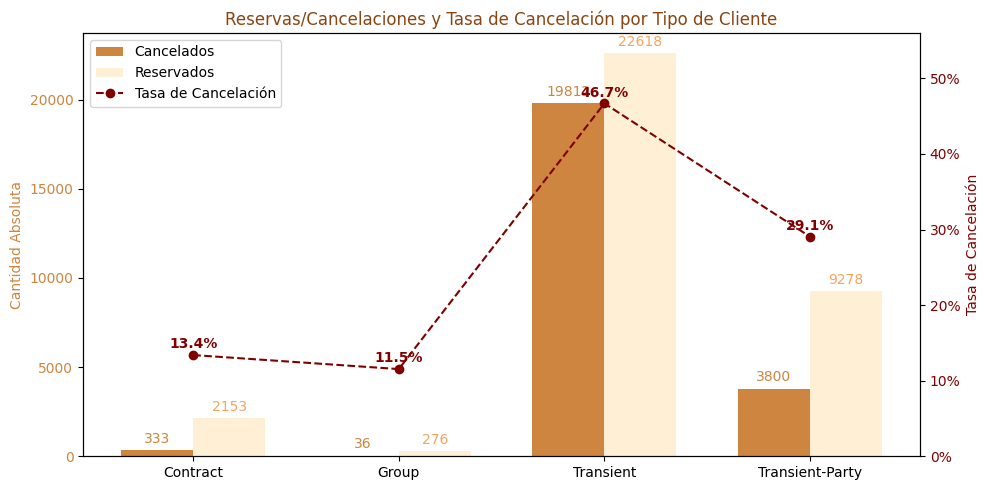

In [107]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de Cliente', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Tipo de Habitación (Reservada y Asignada)

In [ ]:
reservas.loc[reservas['reserved_room_type'] == reservas['assigned_room_type'], 'CambioHabitacion'] = 0
reservas.loc[reservas['reserved_room_type'] != reservas['assigned_room_type'], 'CambioHabitacion'] = 1
reservas[['CambioHabitacion','reserved_room_type','assigned_room_type']].head()

In [147]:
pivot = reservas.pivot_table(index=['CambioHabitacion'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

2


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,0.00,25976,23627,49603,0.48
1,1.00,8690,602,9292,0.06


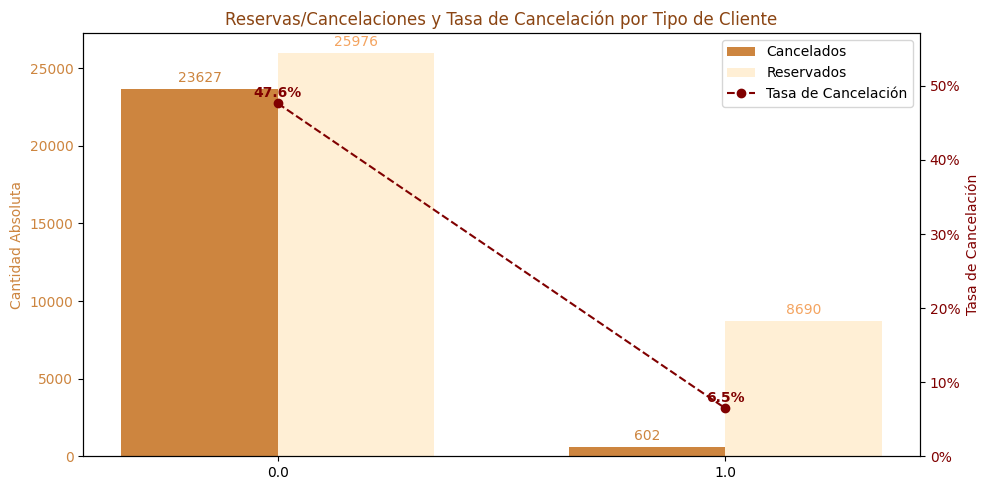

In [149]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Cambio de Habitación', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

In [153]:
reservas.loc[(reservas['CambioHabitacion'] == 1) & (reservas['reserved_room_type'] < reservas['assigned_room_type']),'Mejoramiento'] = 0
reservas.loc[(reservas['CambioHabitacion'] == 1) & (reservas['reserved_room_type'] > reservas['assigned_room_type']),'Mejoramiento'] = 1
reservas.loc[reservas['CambioHabitacion'] == 0, 'Mejoramiento'] = np.nan

reservas[['Mejoramiento','reserved_room_type','assigned_room_type']].head()

,Mejoramiento,reserved_room_type,assigned_room_type
0,NaN,C,C
1,NaN,C,C
2,0.00,A,C
3,NaN,A,A
4,NaN,A,A


In [155]:
pivot = reservas[reservas['CambioHabitacion']==1].pivot_table(index=['Mejoramiento'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

2


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,0.00,8510,588,9098,0.06
1,1.00,180,14,194,0.07


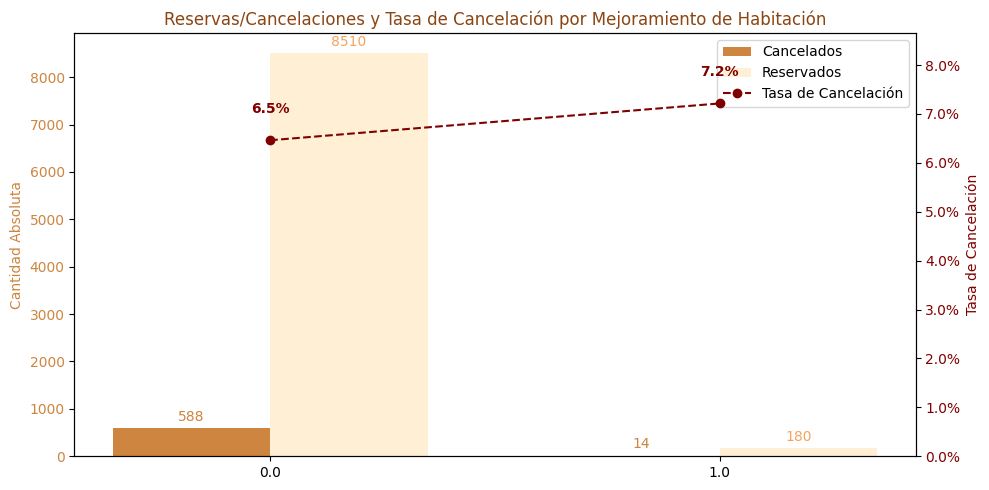

In [156]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Mejoramiento de Habitación', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

## Análisis por Comportamiento Anterio

In [174]:
huespedes_ant = reservas[['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']]

huespedes_ant.loc[huespedes_ant['previous_cancellations'] <= 0, 'prev_cancelations'] = 0
huespedes_ant.loc[huespedes_ant['previous_cancellations'] > 0, 'prev_cancelations'] = 1


huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] <= 0, 'prev_asistences'] = 0
huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] > 0, 'prev_asistences'] = 1

huespedes = huespedes_ant.groupby(['is_repeated_guest','prev_cancelations','prev_asistences']).size().reset_index()
huespedes

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_4692/2045984485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huespedes_ant.loc[huespedes_ant['previous_cancellations'] <= 0, 'prev_cancelations'] = 0
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_4692/2045984485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] <= 0, 'prev_asistences'] = 0


,is_repeated_guest,prev_cancelations,prev_asistences,0
0,0,0.00,0.00,55686
1,0,0.00,1.00,521
2,0,1.00,0.00,822
3,0,1.00,1.00,88
4,1,0.00,0.00,294
5,1,0.00,1.00,1299
6,1,1.00,0.00,61
7,1,1.00,1.00,124


## Cantidad de Reservas y Tasa de Cancelacion por Cambios Reserva

In [176]:
reservas.loc[reservas['booking_changes'] == 0, 'changed'] = 0
reservas.loc[reservas['booking_changes'] > 0, 'changed'] = 1

pivot = reservas.pivot_table(index=['changed'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

2


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,0.00,26922,22346,49268,0.45
1,1.00,7744,1883,9627,0.20


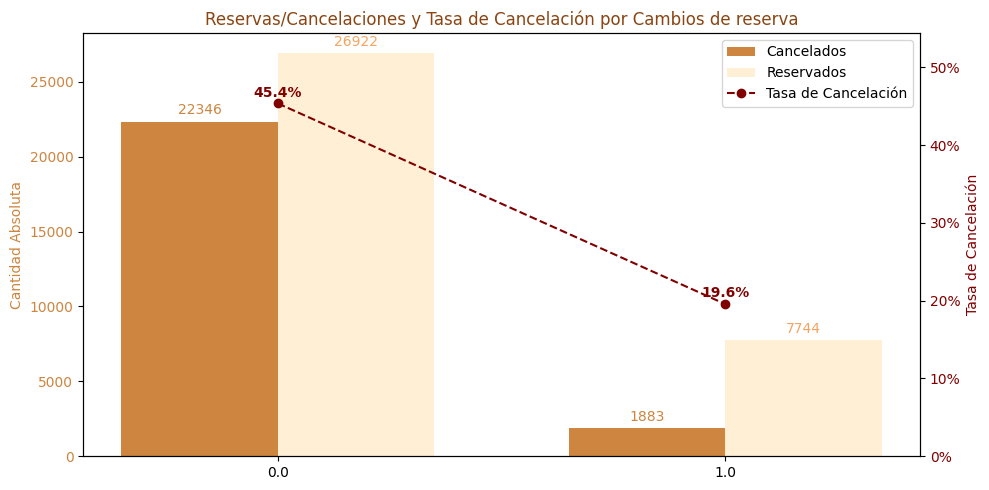

In [177]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Cambios de reserva', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

### Explore the *Cuantitative* columns

In [5]:
# Getting the main statistics for the Value column
reservas[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,58895.00,58307.00,58895,58895.00,58895.00,58895.00,58895.00,58895.00,58891.00,58895.00,58895.00,58894.00,58306.00,58894.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2205.52,NaN,27.84,15.77,1.06,2.85,1.97,0.11,0.14,0.24,3.53,0.10,0.51
std,101.16,1837.39,NaN,13.35,8.78,1.09,2.24,2.94,0.42,3.12,0.70,21.84,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00


In [108]:
## Modificacion mes llegada
reservas['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [109]:
reservas['mes_llegada'] = reservas['arrival_date_month'].map(lambda x : datetime.strptime(x,'%B') if x!= None else 0)
reservas['mes_llegada'] = reservas['mes_llegada'].map(lambda x : datetime.strftime(x,'%-m') if x!= None else 0)
reservas['mes_llegada'].unique()

array(['7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [9]:
## Limpieza año llegada
reservas['arrival_date_year'].unique()

array([ 2015.,    nan, 20016.,  2016.,  2017.])

In [110]:
reservas['arrival_date_year'] = reservas['arrival_date_year'].map(lambda x: 2016 if x == 20016 else x)
reservas['arrival_date_year'].unique()

array([2015.,   nan, 2016., 2017.])

In [111]:
reservas['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [112]:
reservas['fecha'] = pd.to_datetime({'year': reservas['arrival_date_year'], 'month': reservas['mes_llegada'], 'day': 1})
reservas.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Id,mes_llegada,fecha
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN,0,7,2015-07-01
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN,1,7,2015-07-01
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN,2,7,2015-07-01
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN,3,7,2015-07-01
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN,4,7,2015-07-01


In [113]:
pivot = reservas.pivot_table(index=['fecha'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count())
renamed.head()

26


is_canceled,Caracteristica,SinCancelar,Cancelados,Total,TasaCancelacion
0,2015-07-01,1292,563,1855,0.30
1,2015-08-01,2128,838,2966,0.28
2,2015-09-01,2390,1167,3557,0.33
3,2015-10-01,2029,904,2933,0.31
4,2015-11-01,1192,310,1502,0.21


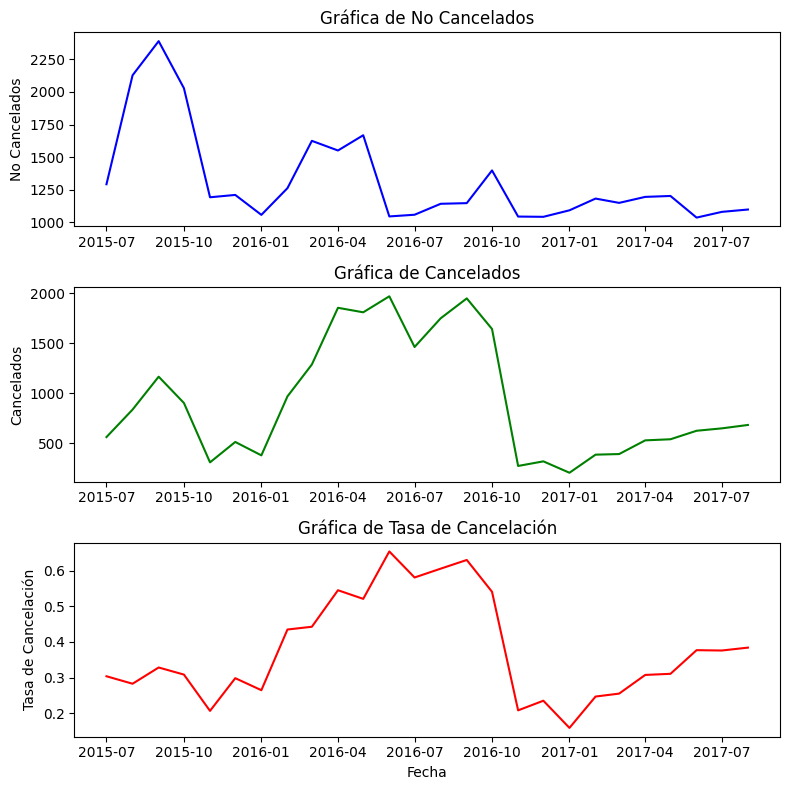

In [116]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
axs[0].plot(labels, reservados, color='blue')
axs[0].set_title('Gráfica de No Cancelados')
axs[0].set_ylabel('No Cancelados')

axs[1].plot(labels, cancelados, color='green')
axs[1].set_title('Gráfica de Cancelados')
axs[1].set_ylabel('Cancelados')

axs[2].plot(labels, tasa_cancelacion, color='red')
axs[2].set_title('Gráfica de Tasa de Cancelación')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Tasa de Cancelación')

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

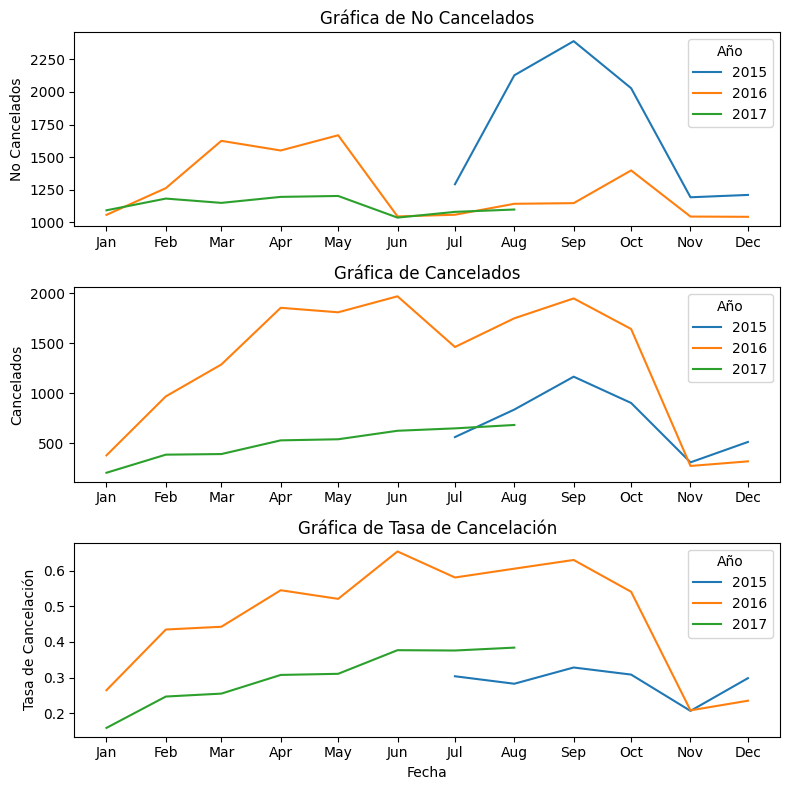

In [131]:
renamed['year'] = renamed['Caracteristica'].dt.year
renamed['month_day'] = renamed['Caracteristica'].dt.strftime('%m-%d') # Format as "MM-DD"
renamed['month_day_date'] = pd.to_datetime('2000-' + renamed['month_day'])
years = renamed['year'].unique()


fig, axs = plt.subplots(3, 1, figsize=(8, 8))

for year in years:
    df_year = renamed[renamed['year'] == year]
    axs[0].plot(df_year['month_day_date'], df_year['SinCancelar'], label=str(year))
    
axs[0].legend(title='Año')
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0].set_title('Gráfica de No Cancelados')
axs[0].set_ylabel('No Cancelados')


for year in years:
    df_year = renamed[renamed['year'] == year]
    axs[1].plot(df_year['month_day_date'], df_year['Cancelados'], label=str(year))
    
axs[1].legend(title='Año')   
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].set_title('Gráfica de Cancelados')
axs[1].set_ylabel('Cancelados')


for year in years:
    df_year = renamed[renamed['year'] == year]
    axs[2].plot(df_year['month_day_date'], df_year['TasaCancelacion'], label=str(year))
    
axs[2].legend(title='Año')
axs[2].set_title('Gráfica de Tasa de Cancelación')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Tasa de Cancelación')


axs[2].legend(title='Año')
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b')) # %b for abbreviated month names


# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()


,CambioHabitacion,reserved_room_type,assigned_room_type
0,0.00,C,C
1,0.00,C,C
2,1.00,A,C
3,0.00,A,A
4,0.00,A,A


In [11]:
## Limpieza adultos
reservas['adults'].value_counts()

adults
 2      45712
 1      10610
 3       2225
 0        104
-1         99
 4         34
 66         6
 65         5
 26         5
 69         4
 91         4
 59         4
 54         4
 53         4
 95         3
 100        3
 79         3
 76         3
 84         3
 50         3
 72         3
 78         2
 73         2
 62         2
 52         2
 27         2
 86         2
 92         2
 80         2
 98         2
 56         2
 64         2
 55         2
 20         2
 60         2
 83         2
 5          2
 96         2
 51         2
 57         2
 68         2
 67         2
 77         1
 85         1
 87         1
 89         1
 40         1
 93         1
 58         1
 61         1
 63         1
 10         1
 6          1
 75         1
Name: count, dtype: int64

In [12]:
reservas = reservas[~reservas['adults'].isin([0,-1])]
reservas['adults'].value_counts()

adults
2      45712
1      10610
3       2225
4         34
66         6
65         5
26         5
54         4
53         4
91         4
59         4
69         4
79         3
84         3
100        3
76         3
95         3
50         3
72         3
78         2
73         2
62         2
52         2
27         2
86         2
92         2
80         2
98         2
56         2
64         2
55         2
20         2
60         2
83         2
5          2
96         2
51         2
57         2
68         2
67         2
77         1
85         1
87         1
89         1
40         1
93         1
58         1
61         1
63         1
10         1
6          1
75         1
Name: count, dtype: int64

In [13]:
## Limpieza babies
reservas['babies'].value_counts()

babies
 0      57892
 1        597
-1         90
 2          9
 51         6
 57         5
 77         5
 73         5
 81         4
 94         4
 56         4
 97         4
 65         4
 92         3
 59         3
 67         3
 61         3
 70         3
 66         3
 93         3
 100        2
 55         2
 78         2
 63         2
 99         2
 75         2
 53         2
 98         2
 69         2
 96         2
 71         2
 72         2
 58         2
 52         2
 82         2
 10         1
 83         1
 50         1
 91         1
 62         1
 60         1
 84         1
 89         1
 54         1
 95         1
 74         1
 88         1
Name: count, dtype: int64

In [ ]:
reservas = reservas[~reservas['babies'].isin([-1])]
reservas['babies'].value_counts()

In [15]:

reservas[['lead_time','arrival_date_year','mes_llegada','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,mes_llegada,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,58602.00,58018.00,58602,58602.00,58602.00,58602.00,58602.00,58602.00,58598.00,58602.00,58602.00,58601.00,58015.00,58601.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2015.97,NaN,27.84,15.77,1.06,2.85,1.98,0.11,0.14,0.24,3.52,0.10,0.51
std,101.17,0.69,NaN,13.34,8.78,1.09,2.24,2.95,0.41,3.12,0.69,21.84,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
table = pd.pivot_table(reservas, values='D', index=['is_canceled','Fecha'],
                       columns=['C'], aggfunc="count")

In [31]:
df2 = reservas.groupby(['is_canceled','Fecha'])['hotel'].agg('count') #.reset_index()
df2.head(20)

is_canceled  Fecha     
0            2015-07-01    39
             2015-07-02    35
             2015-07-03    36
             2015-07-04    36
             2015-07-05    35
             2015-07-06    40
             2015-07-07    29
             2015-07-08    23
             2015-07-09    28
             2015-07-10    40
             2015-07-11    55
             2015-07-12    36
             2015-07-13    38
             2015-07-14    24
             2015-07-15    31
             2015-07-16    40
             2015-07-17    50
             2015-07-18    74
             2015-07-19    36
             2015-07-20    52
Name: hotel, dtype: int64

In [18]:
reservas['Fecha'] = pd.to_datetime({'year': reservas['arrival_date_year'], 'month': reservas['mes_llegada'], 'day': reservas['arrival_date_day_of_month']})

reservasFecha = reservas.groupby(['Fecha','is_canceled']).agg({ 'is_canceled': ['count']})
reservasFecha.head(5)

is_canceled
                             count
Fecha      is_canceled            
2015-07-01 0                    39
           1                     8
2015-07-02 0                    35
           1                    14
2015-07-03 0                    36

In [ ]:
reservas['lead_time'].hist()
plt.title('Histograma de Columna1')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

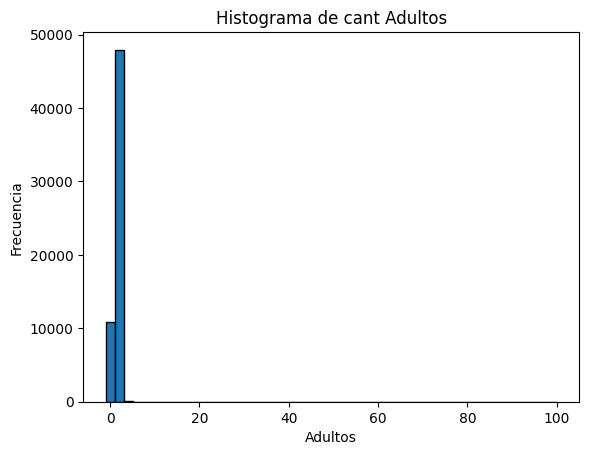

In [80]:
## Limpieza adultos
plt.hist(reservas['adults'], bins=50, edgecolor='black') 
plt.xlabel("Cantidad adultos")
plt.ylabel("Frecuencia")
plt.title("Histograma de cant Adultos")
plt.show()

<p style="color: red;">Modify the code above to show percentiles 95 and 99</p>

In [ ]:
# Computing skewness and kurtosis
print("Skewness:", fifa_df['Value'].skew())
print("Kurtosis:", fifa_df['Value'].kurtosis())

In [ ]:
# Plotting the histogram for the column
fifa_df['Value'].hist()
plt.show()

In [ ]:
# Defining the number of bins and for better visualization
plt.figure()
fifa_df['Value'].hist(bins=50)
plt.show()

In [ ]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(18, 3))
plt.boxplot(fifa_df['Value'], showmeans=True, vert=False)
plt.show()

In [ ]:
# Which are the most valuable players?
outlier_threshold = fifa_df['Value'].mean() + fifa_df['Value'].std() * 15
fifa_df[fifa_df['Value'] > outlier_threshold]

In [ ]:
# Using the method based on quartiles to select outliers
iqr = (fifa_df['Value'].quantile(.75) - fifa_df['Value'].quantile(.25))
outlier_threshold = fifa_df['Value'].quantile(.75) + iqr * 45
fifa_df[fifa_df['Value'] > outlier_threshold]

### Explore the *Preferred Positions* column

In [ ]:
fifa_df['Preferred Positions'].unique()

In [ ]:
# How many preferred positions the players have?

def count_pref_positions(x):
    positions = x.strip().split(' ')    # Split the text by space
    return len(positions)               # Count the number of positions and return the value

fifa_df['Preferred Positions'].apply(count_pref_positions).value_counts(dropna=False, normalize=True)

In [ ]:
# Selecting the preferred position with the highest score

def get_pref_position(row):
    pref_positions = row['Preferred Positions'].strip().split(' ')    # Split the text by space
    if pref_positions[0] == "GK":                                     # Handle the special case for GKs
        return "GK"
    scores = np.array([row[p] for p in pref_positions])               # Get the the scores for each preferred position
    i_max = np.argmax(scores)                                         # Get the index for the highest score
    return pref_positions[i_max]                                      # Locate the position using its index and return it

fifa_df['Preferred Position'] = fifa_df.apply(get_pref_position, axis=1)

In [ ]:
# Calculating the absolute frecuency of the preferred position
pref_positions_abs_frec = fifa_df['Preferred Position'].value_counts(dropna=False)
pref_positions_abs_frec

In [ ]:
# Plotting preferred position frecuency
# WARNING: line chart assumes continuity. It is a better choice when dealing with continuous variables (e.g. time series)
pref_positions_abs_frec.plot()
plt.show()

<p style="color: red;">Use a bar chart to better visualize the preferred position frecuency</p>

### Explore the relationship between *Age* and *Value*

In [ ]:
# Plotting a scatter plot to visualize two quantitative variables
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Age'], fifa_df['Value'], alpha=0.5)
plt.title('Age vs. Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Age', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Age', 'Value']].corr('spearman')

### Explore the relationship between *Overall* and *Value*

In [ ]:
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Overall'], fifa_df['Value'], alpha=0.5, color='orange')
plt.title('Overall vs. Value')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Overall', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Overall', 'Value']].corr('spearman')

<p style="color: red;">Why both methods give different correlation coefficients for the same pair of variables?</p>

### Compare by *Club*

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Real Madrid CF', 'FC Barcelona'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

<p style="color: red;">What are the main origins (Nationality) of the players in the top 3 teams with the most expensive squads (Value)? Hint: You need to group the data first.</p>

### Profiling the data

In [ ]:
profile = ProfileReport(fifa_df)

In [ ]:
# profile.to_notebook_iframe()

In [ ]:
# profile.to_file('report.html')

### Exporting clean date

In [ ]:
fifa_df.to_csv('./data/fifa_clean.csv', index=False)